**Predicting whether a customer will churn by learning models on telecom industry dataset provided by IBM data community-**

This notebook covers following contents -
*  Reading the data
*  Overview of data's structure - how various features and their respective values look  
    like?
*  Finding and handling missing values
*  Dealing with categorical attributes
*  Identifying higher correlation features (with the target)
*  Generating relevant insights about values of these high correlation features for churned customers (A Tableau  
    worksheet is attached for some plots - see the dashboards)
*  Preparing data for models
*  Model generation and performance evaluation

In [1]:
# Import necessary packages to read, process and visualize data
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt     # Generate plots
import seaborn as sns               # Visualization
%matplotlib inline

# Read the data
filename = "../input/WA_Fn-UseC_-Telco-Customer-Churn.csv"
data = pd.read_csv(filename)

# Let us see the shape of data
print(data.shape)   
# Following output shows there are 7043 rows and 21 columns in our data

(7043, 21)


In [2]:
# Overview and statistical details of the data..
# Let us see first five rows to understand what type of values exist for each columns
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


From above we can see there are mostly categorical features in the data. 
However, it is better to obtain exact information about each column.

In [3]:
# To view all column names and their respective data types
data.columns
data.info()
data.describe() # Shows statistical summaries for all numeric columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


From above output we can observe :
*  Mean Monthly charges is about 64.76 units and 75% of observations are monthly charged around 89.85
*  The maximum tenure is 72 months with mean being about 32 months.
*  About 50% of customers stayed for 55 months tenure and were charged 70.3 per month  
To get more relevant information, we will visualize attributes of the data and distribution of target variable(Churn)

([<matplotlib.patches.Wedge at 0x7f28a4d7a7f0>,
 [Text(-0.739368,0.814454,'No'), Text(0.739368,-0.814454,'Yes')],
 [Text(-0.403292,0.444248,'73.5%'), Text(0.403292,-0.444248,'26.5%')])

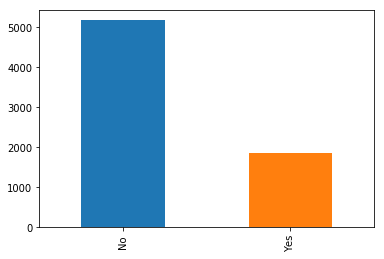

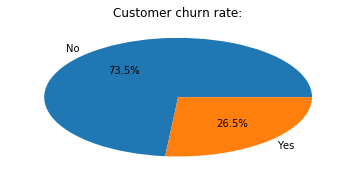

In [4]:
# Plot distribution of dependent/target variable - Churn column
data['Churn'].value_counts().head().plot.bar()   # To generate a bar plot

# To generate a pie chart. Since there are only two classes, a pie chart may look more appealing
sizes = data['Churn'].value_counts(sort = True)
labels = np.unique(data.Churn)

# Visualize the data
plt.figure(figsize = (6,6))
plt.subplot(212)
plt.title("Customer churn rate:")
plt.pie(sizes, labels = labels, autopct='%1.1f%%')

# Bar & pie plots below show that number of customers churned is less than half of not churned.

In [5]:
# Convert following object type columns to numeric        
data.TotalCharges = pd.to_numeric(data.TotalCharges, errors = 'coerce')

In [6]:
# Let us find if there are any missing values in our data.
print("No. of missing values: \n",data.isnull().sum())

No. of missing values: 
 customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


Output shows that there are 11 total missing values in TotalCharges column.

In [7]:
# Drop CustomerId column as it is not required
data.drop(['customerID'], axis = 1, inplace = True)

# Fill the missing values with 0
data['TotalCharges'] = data['TotalCharges'].fillna(0.0)

# Check for any existing missing values
print("Missing values now: \n", data.isnull().sum())

Missing values now: 
 gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


Missing values for all columns are now 0. So, no more missing data.

In [8]:
# Now let us work on categorical features. 
data.gender = [1 if x == "Male" else 0 for x in data.gender]
for col in ('Partner', 'Dependents', 'PhoneService' , 'OnlineSecurity',
        'OnlineBackup','DeviceProtection', 'TechSupport','StreamingTV',
        'StreamingMovies','PaperlessBilling','MultipleLines','Churn'):
    data[col] = [1 if x == "Yes" else 0 for x in data[col]]        
data.head(10)   # See how data looks like now

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,1,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1
5,0,0,0,0,8,1,1,Fiber optic,0,0,1,0,1,1,Month-to-month,1,Electronic check,99.65,820.50,1
6,1,0,0,1,22,1,1,Fiber optic,0,1,0,0,1,0,Month-to-month,1,Credit card (automatic),89.10,1949.40,0
7,0,0,0,0,10,0,0,DSL,1,0,0,0,0,0,Month-to-month,0,Mailed check,29.75,301.90,0
8,0,0,1,0,28,1,1,Fiber optic,0,0,1,1,1,1,Month-to-month,1,Electronic check,104.80,3046.05,1
9,1,0,0,1,62,1,0,DSL,1,1,0,0,0,0,One year,0,Bank transfer (automatic),56.15,3487.95,0


Now, let us see which features are most effective in causing customer churn.
**Correlation -**
Correlation between variables shows how dependent variable changes due to an independent variable under consideration. 
A value close to +1 signifies strong positive correlation, while close to -1 shows strong negative effect. Correlation coeff. close to zero signifies weak relation between features. 

In [9]:
# Print correlation between all features and target variable
data.corr()['Churn'].sort_values()

tenure             -0.352229
TotalCharges       -0.198324
OnlineSecurity     -0.171226
TechSupport        -0.164674
Dependents         -0.164221
Partner            -0.150448
OnlineBackup       -0.082255
DeviceProtection   -0.066160
gender             -0.008612
PhoneService        0.011942
MultipleLines       0.040102
StreamingMovies     0.061382
StreamingTV         0.063228
SeniorCitizen       0.150889
PaperlessBilling    0.191825
MonthlyCharges      0.193356
Churn               1.000000
Name: Churn, dtype: float64

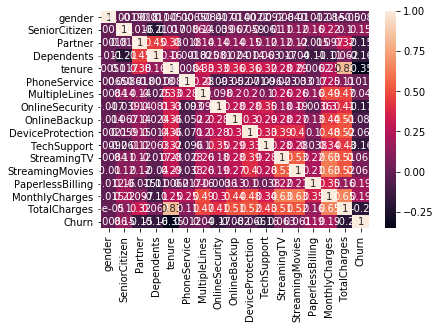

In [10]:
# Plot heatmap using Seaborn to visualize correlation amongst ftrs.
sns.heatmap(data.corr(), annot = True)

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


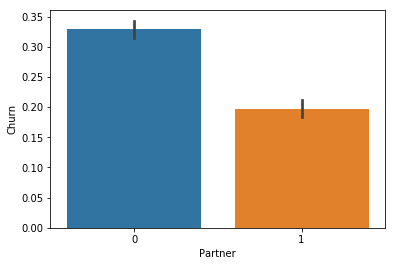

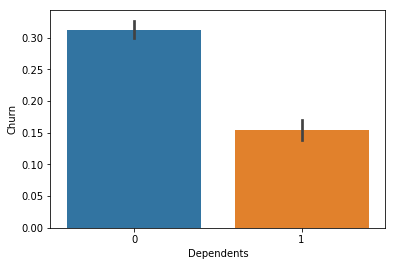

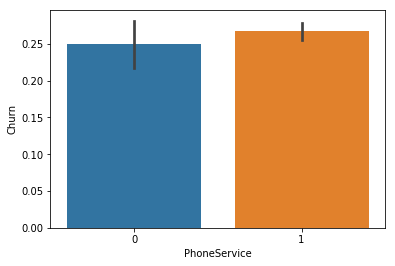

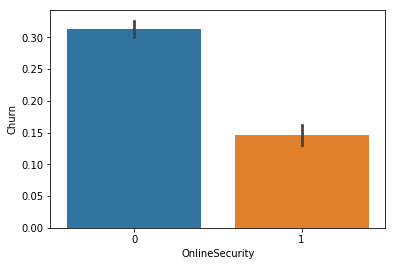

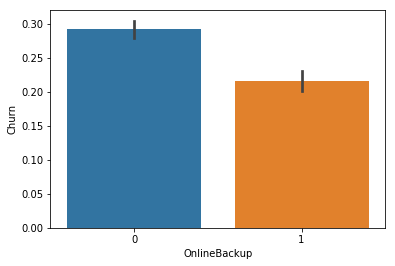

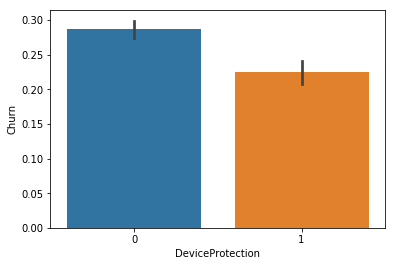

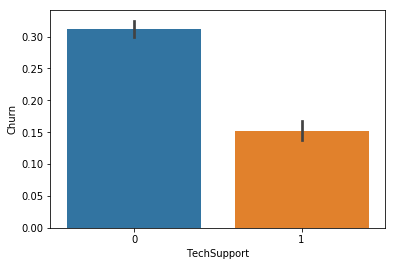

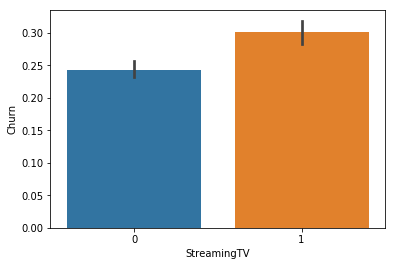

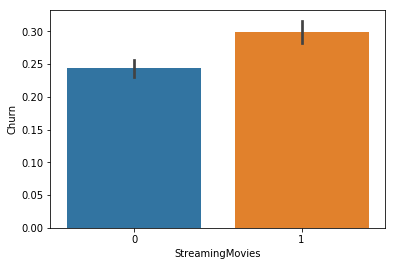

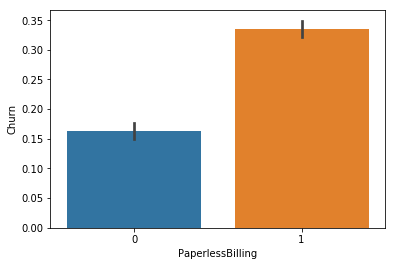

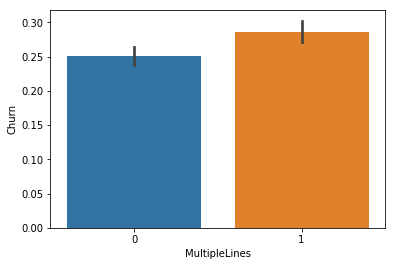

In [11]:
# For following features, let us generate bar plots w.r.t. target variable
for col in ('Partner', 'Dependents', 'PhoneService' , 'OnlineSecurity',
        'OnlineBackup','DeviceProtection', 'TechSupport','StreamingTV',
        'StreamingMovies','PaperlessBilling','MultipleLines'):
    sns.barplot(x = col, y = 'Churn', data = data)
    plt.show()
# Following plots show Churn rate for each category of these categorical features.    

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/opt/conda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/opt/conda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/opt/conda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


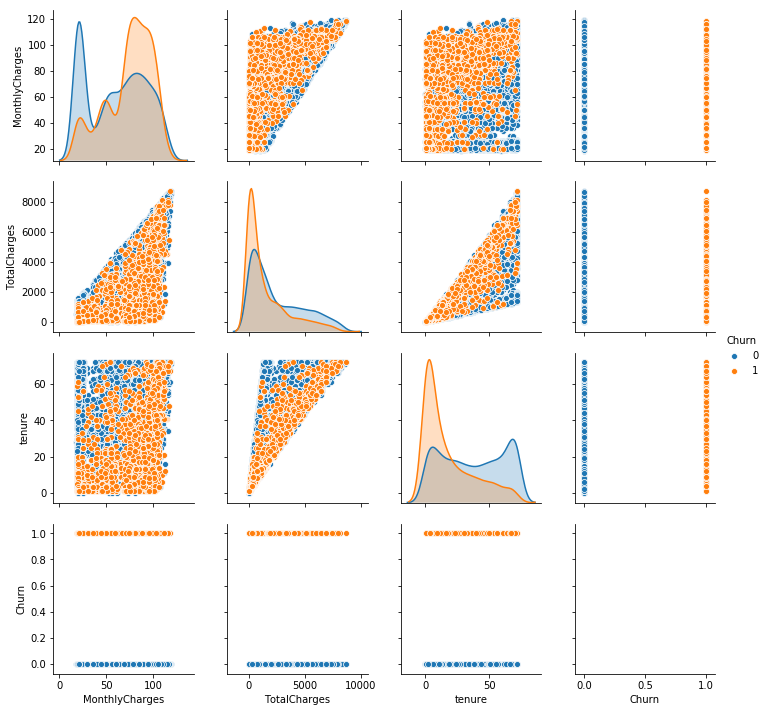

In [12]:
# Generate pairplots for all features.
highCorrCols = ['MonthlyCharges','TotalCharges','tenure', 'Churn']
sns.pairplot(data[highCorrCols], hue = 'Churn')

[Dashboards for More Data Visualization and EDA!](https://public.tableau.com/profile/shubha#!/vizhome/ContractInternetService/Dashboard1)
Insights from above plots -
* Each categorical plot shows which of their categories there is a higher customer churn rate.
From Dashboard 1 -
* Most customers with Month-to-month contract and Fibre optic Internet Service churned.
* Customers with Two-year contract and No Internet service have least churn rate. 
* Customers who did churn showed a declining trend with increase in tenure period.
* Customers who did not churn increased when tenure is very less (0-5 months) and more than 66   
  months (showing a peak towards the ends with dropped curve in the middle).
* When Monthly Charges are less, less customer churn rate is observed seeing maximum churn rate at nearly 
  75units Monthly charge.
* Churn rate is higher for customers with Multiple Lines while those with No Phone Service have least churn rate.  

**(Will add and discuss some more dashboards soon..)

In [ ]:
# Prepare data for model training and testing input.
y = data.Churn.values     # Target feature

# All features except class (target)
data = pd.get_dummies(data)
X = data.drop(["Churn"],axis=1)

from sklearn.metrics import accuracy_score, mean_squared_error as mse
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.linear_model import LogisticRegression as LR
from sklearn.svm import SVC 
from sklearn.neural_network import MLPClassifier

# Split the data into training and testing data
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size = 0.2, random_state=1)

# Classification using RBF SVM  
svc_rbf = SVC(kernel = "rbf")
svc_rbf = svc_rbf.fit(X_train,y_train)
prediction = svc_rbf.predict(X_test)
print("Mean-squared error using SVM RBF:", mse(y_test, prediction))
print("Accuracy with SVM RBF:",accuracy_score(y_test, prediction))

# Classification using Random Forest Classifier
rfc = RF(max_depth= 5, n_estimators= 10, max_features= 'auto')
rfc = rfc.fit(X_train,y_train)
prediction = rfc.predict(X_test)
print("Mean-squared error using Random Forest Classifier:", mse(y_test, prediction))
print("Accuracy with Random Forest Classifier:",accuracy_score(y_test, prediction))

# Classification using Logistic Regression
logreg = LR(C = 1)
logreg = logreg.fit(X_train,y_train)
prediction = logreg.predict(X_test)
print("Mean-squared error using Logistic Regression:", mse(y_test, prediction))
print("Accuracy with Logistic Regression:",accuracy_score(y_test, prediction))

# Classification using Multi-layer perceptron 
ann = MLPClassifier(solver='lbfgs', alpha = 1e-5,
                    hidden_layer_sizes = (5, 2), random_state = 1)
ann = ann.fit(X_train, y_train)
prediction = ann.predict(X_test)
print("Mean-squared error using Neural networks MLP:", mse(y_test, prediction))
print("Accuracy with Neural networks MLP:",accuracy_score(y_test, prediction))

/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


This is my first kernel at Kaggle. I will keep on working to improve this and my future kernels. 
Please feel free to provide any advice or suggestions and I would try to make changes accordingly.

If you found this work helpful, please do upvote and comment below.

**Happy learning and thank you!**